# Земских Денис 
   - Научилcя собирать и устанавливать YOLOv8 модель на Kaggle.
   - Разобрал синтаксис Python и работу с YOLOv8.
   - Применил YOLOv8 к изображению, получил корректные координаты и классы объектов.

Команда !nvidia-smi используется для отображения информации о графических процессорах (GPU) NVIDIA, установленных в системе.

In [2]:
!nvidia-smi

Tue Jan 28 12:35:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


Устанавливаем библиотеку ultralytics версии 8.2.103 с помощью pip.
Очищаем вывод в Jupyter Notebook.
Импортируем библиотеку ultralytics.
Выполняем проверку установки и конфигурации библиотеки ultralytics.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6095.9/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

Выполняем запуск YOLO (You Only Look Once) для задачи обнаружения объектов (detect) в режиме предсказания (predict) с использованием модели yolov8n.pt.

- `task=detect`: Указывает, что задача - обнаружение объектов.
- `mode=predict`: Указывает, что режим - предсказание.
- `model=yolov8n.pt`: Указывает, что используется модель yolov8n.pt.
- `conf=0.25`: Устанавливает порог уверенности для предсказаний на 0.25.
- `source='https://media.roboflow.com/notebooks/examples/dog.jpeg'`: Указывает URL-адрес изображения, на котором будет выполняться обнаружение объектов.
- `save=True`: Указывает, что результаты предсказания должны быть сохранены.

Сначала меняем текущий рабочий каталог на домашний, а затем запускаем модель YOLO для обнаружения объектов на изображении, загруженном по указанному URL, и сохраняем результаты.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 186MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 89.0MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 83.8ms
Speed: 10.9ms preprocess, 83.8ms inference, 265.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/kaggle/working/datasets


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2UgAsIW11EHQmt8gh36L")
project = rf.workspace("wildfire-kwxfu").project("wildfire-tksrf")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-4 in yolov8:: 100%|██████████| 7764/7764 [00:00<00:00, 9404.73it/s]


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 309MB/s]
New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/Wildfire-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_bu

/kaggle/working


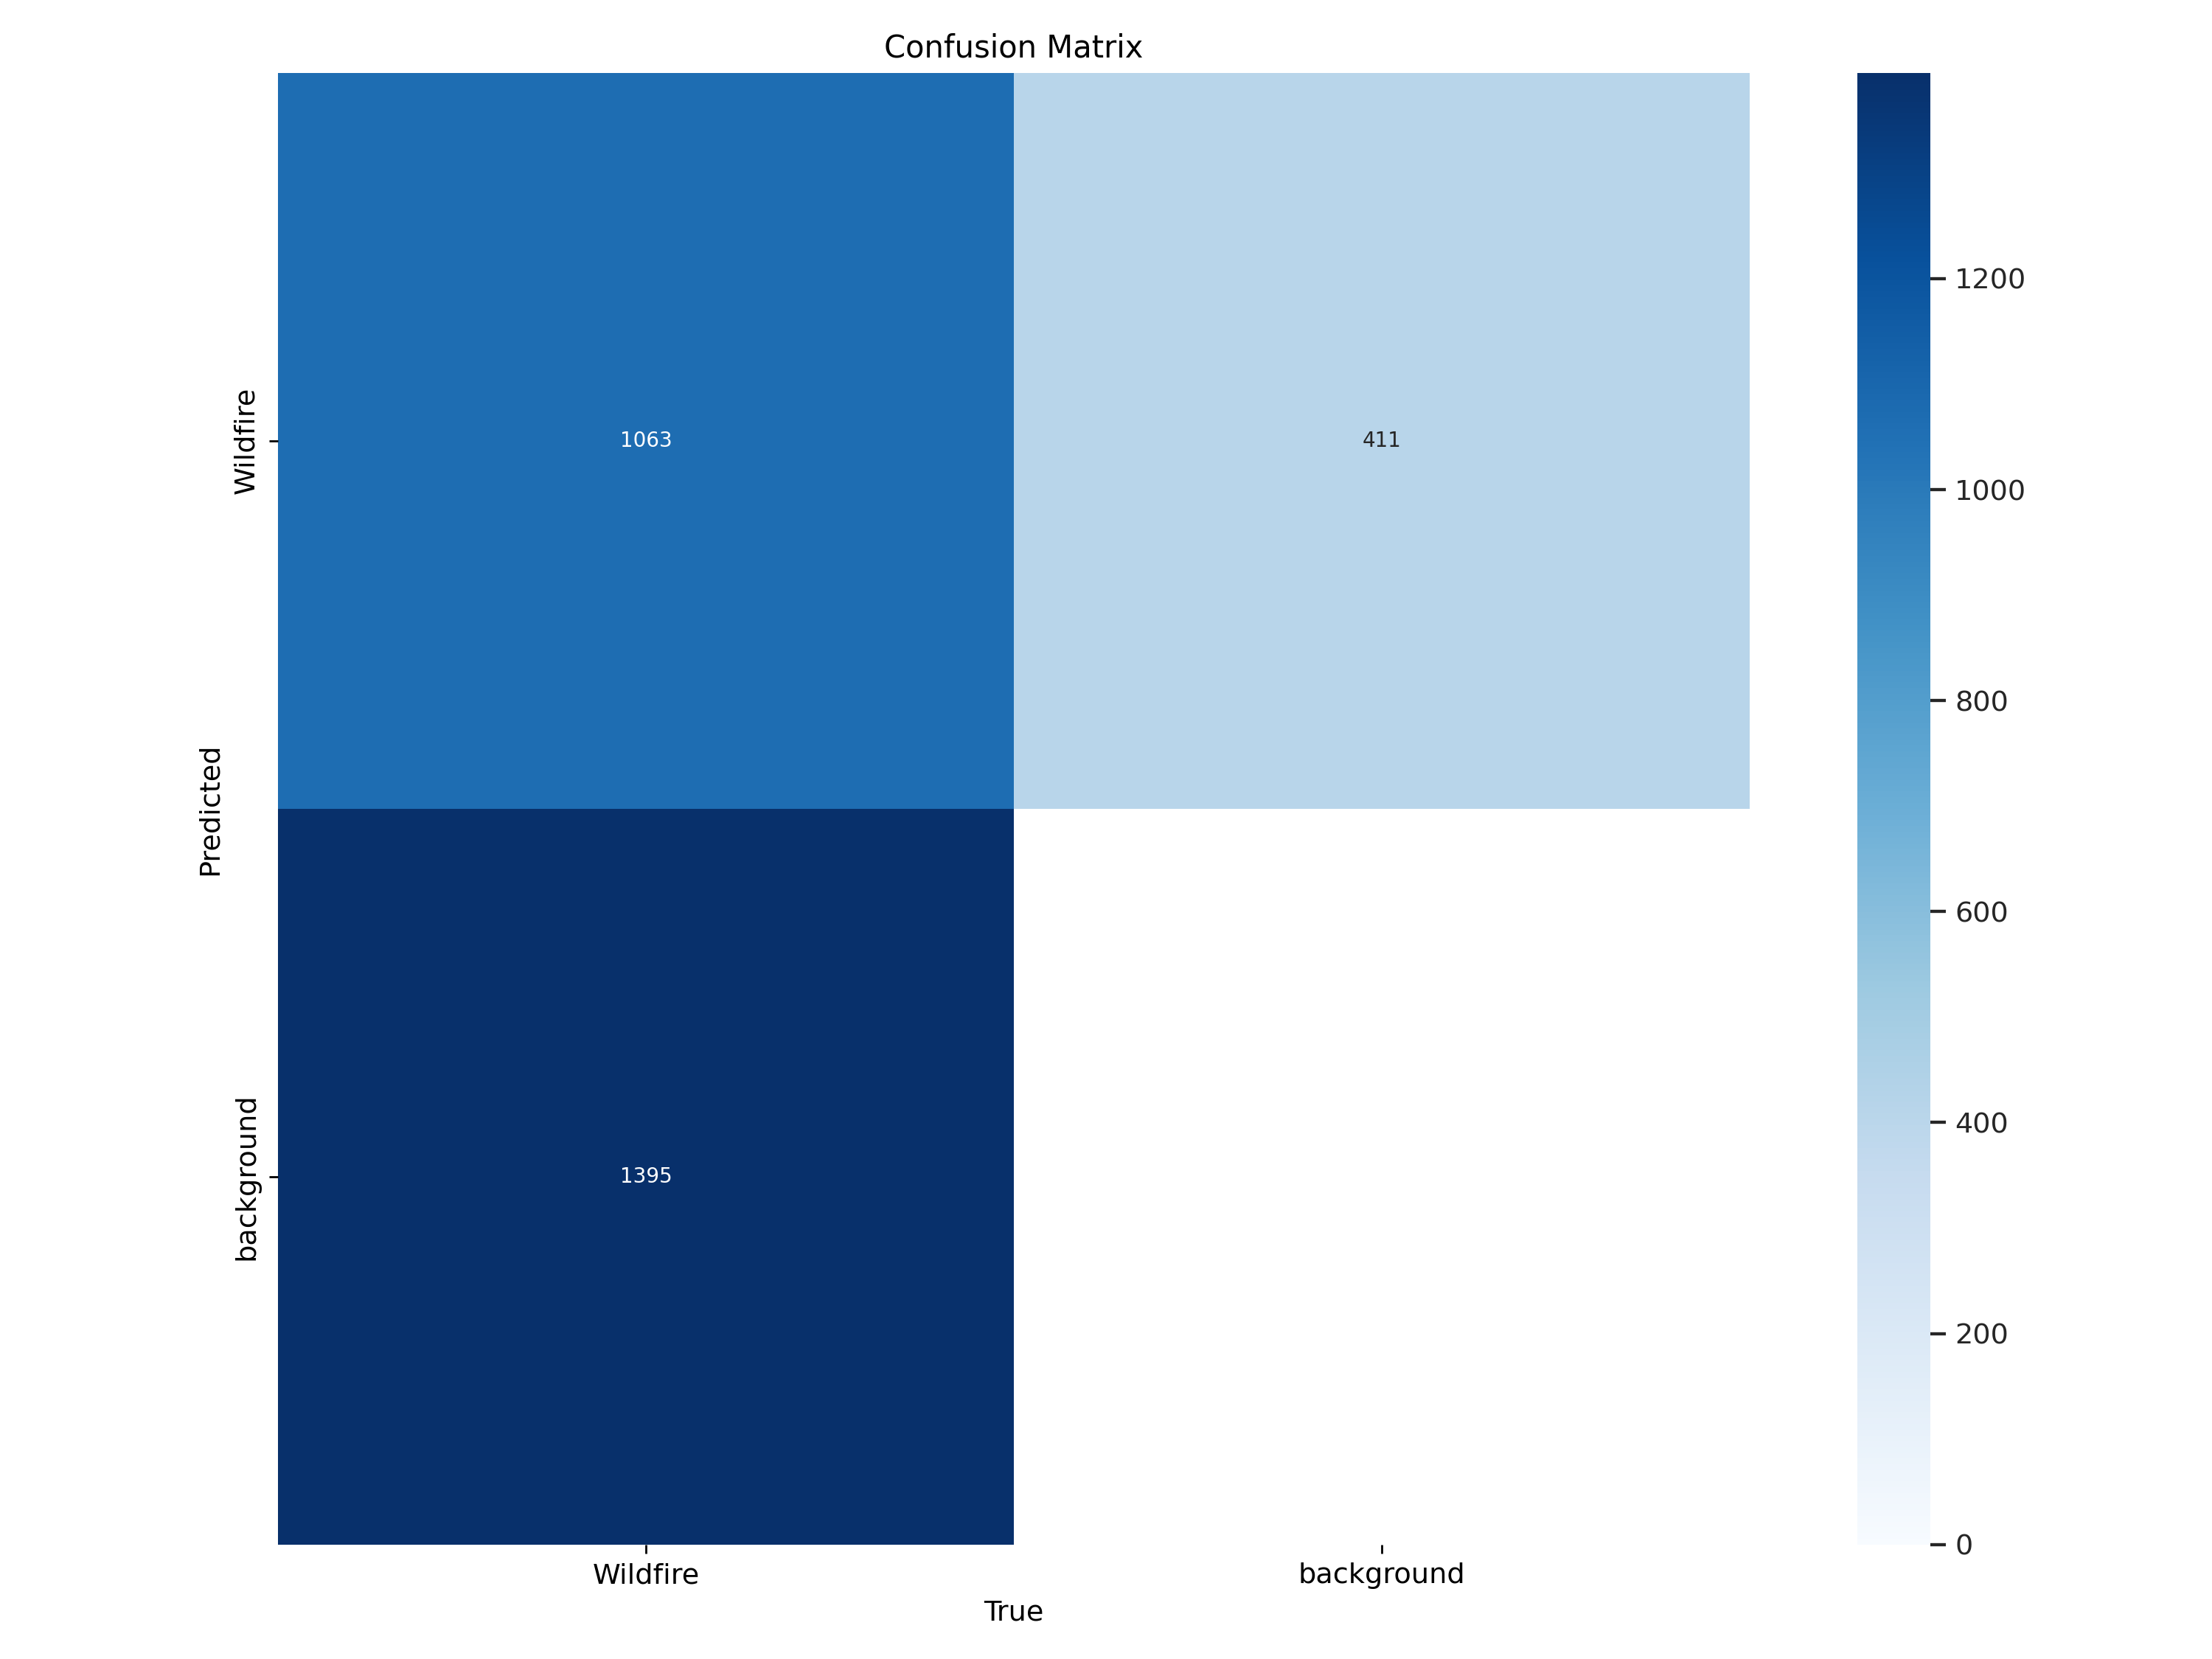

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


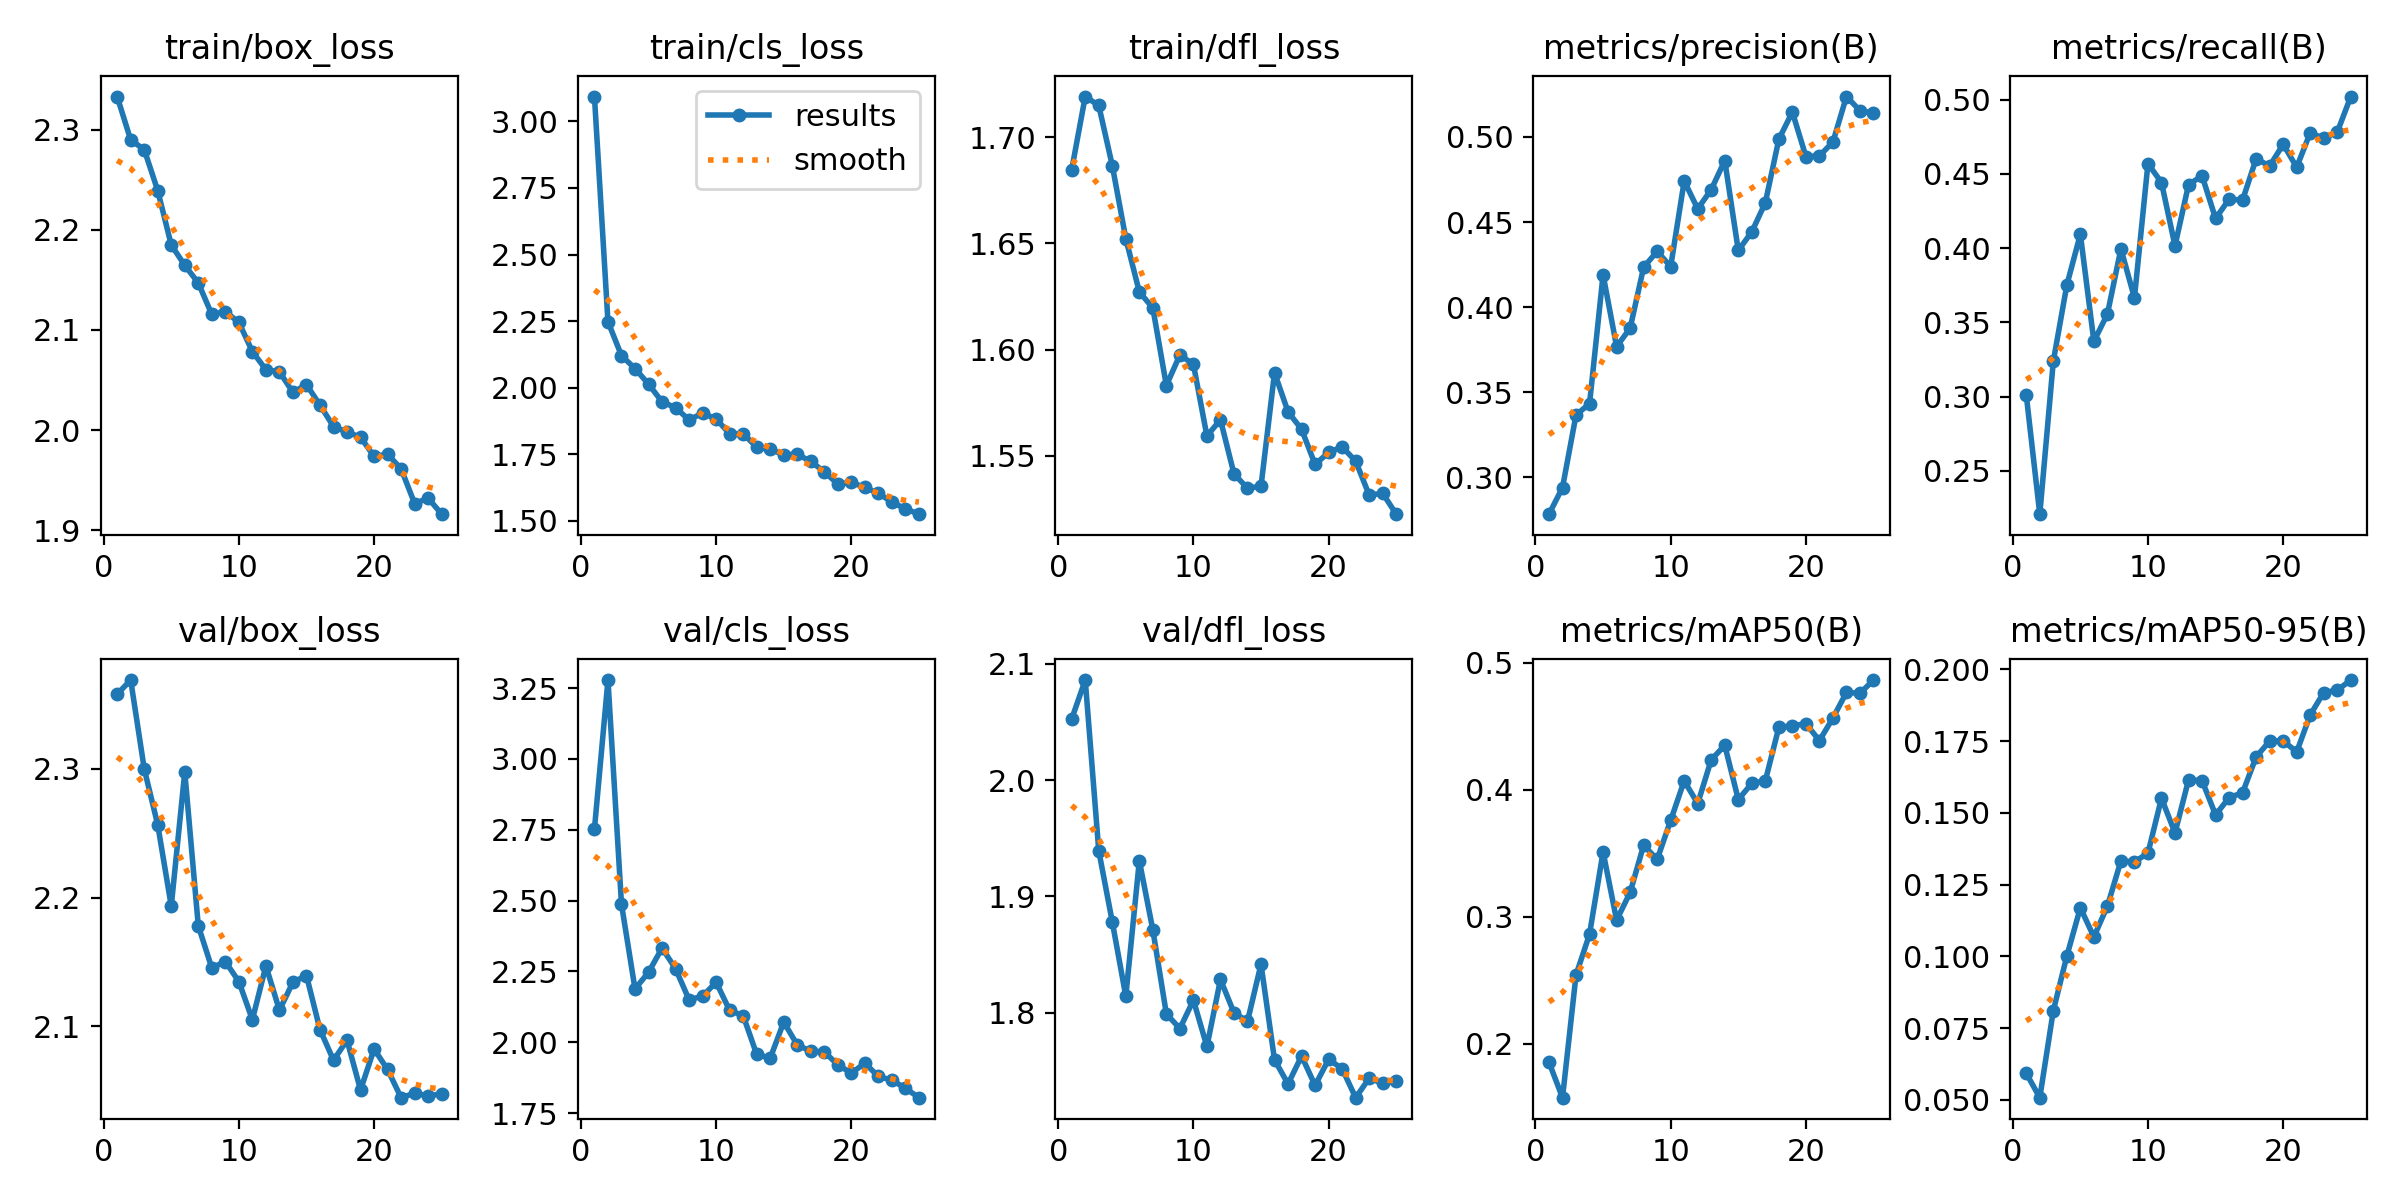

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


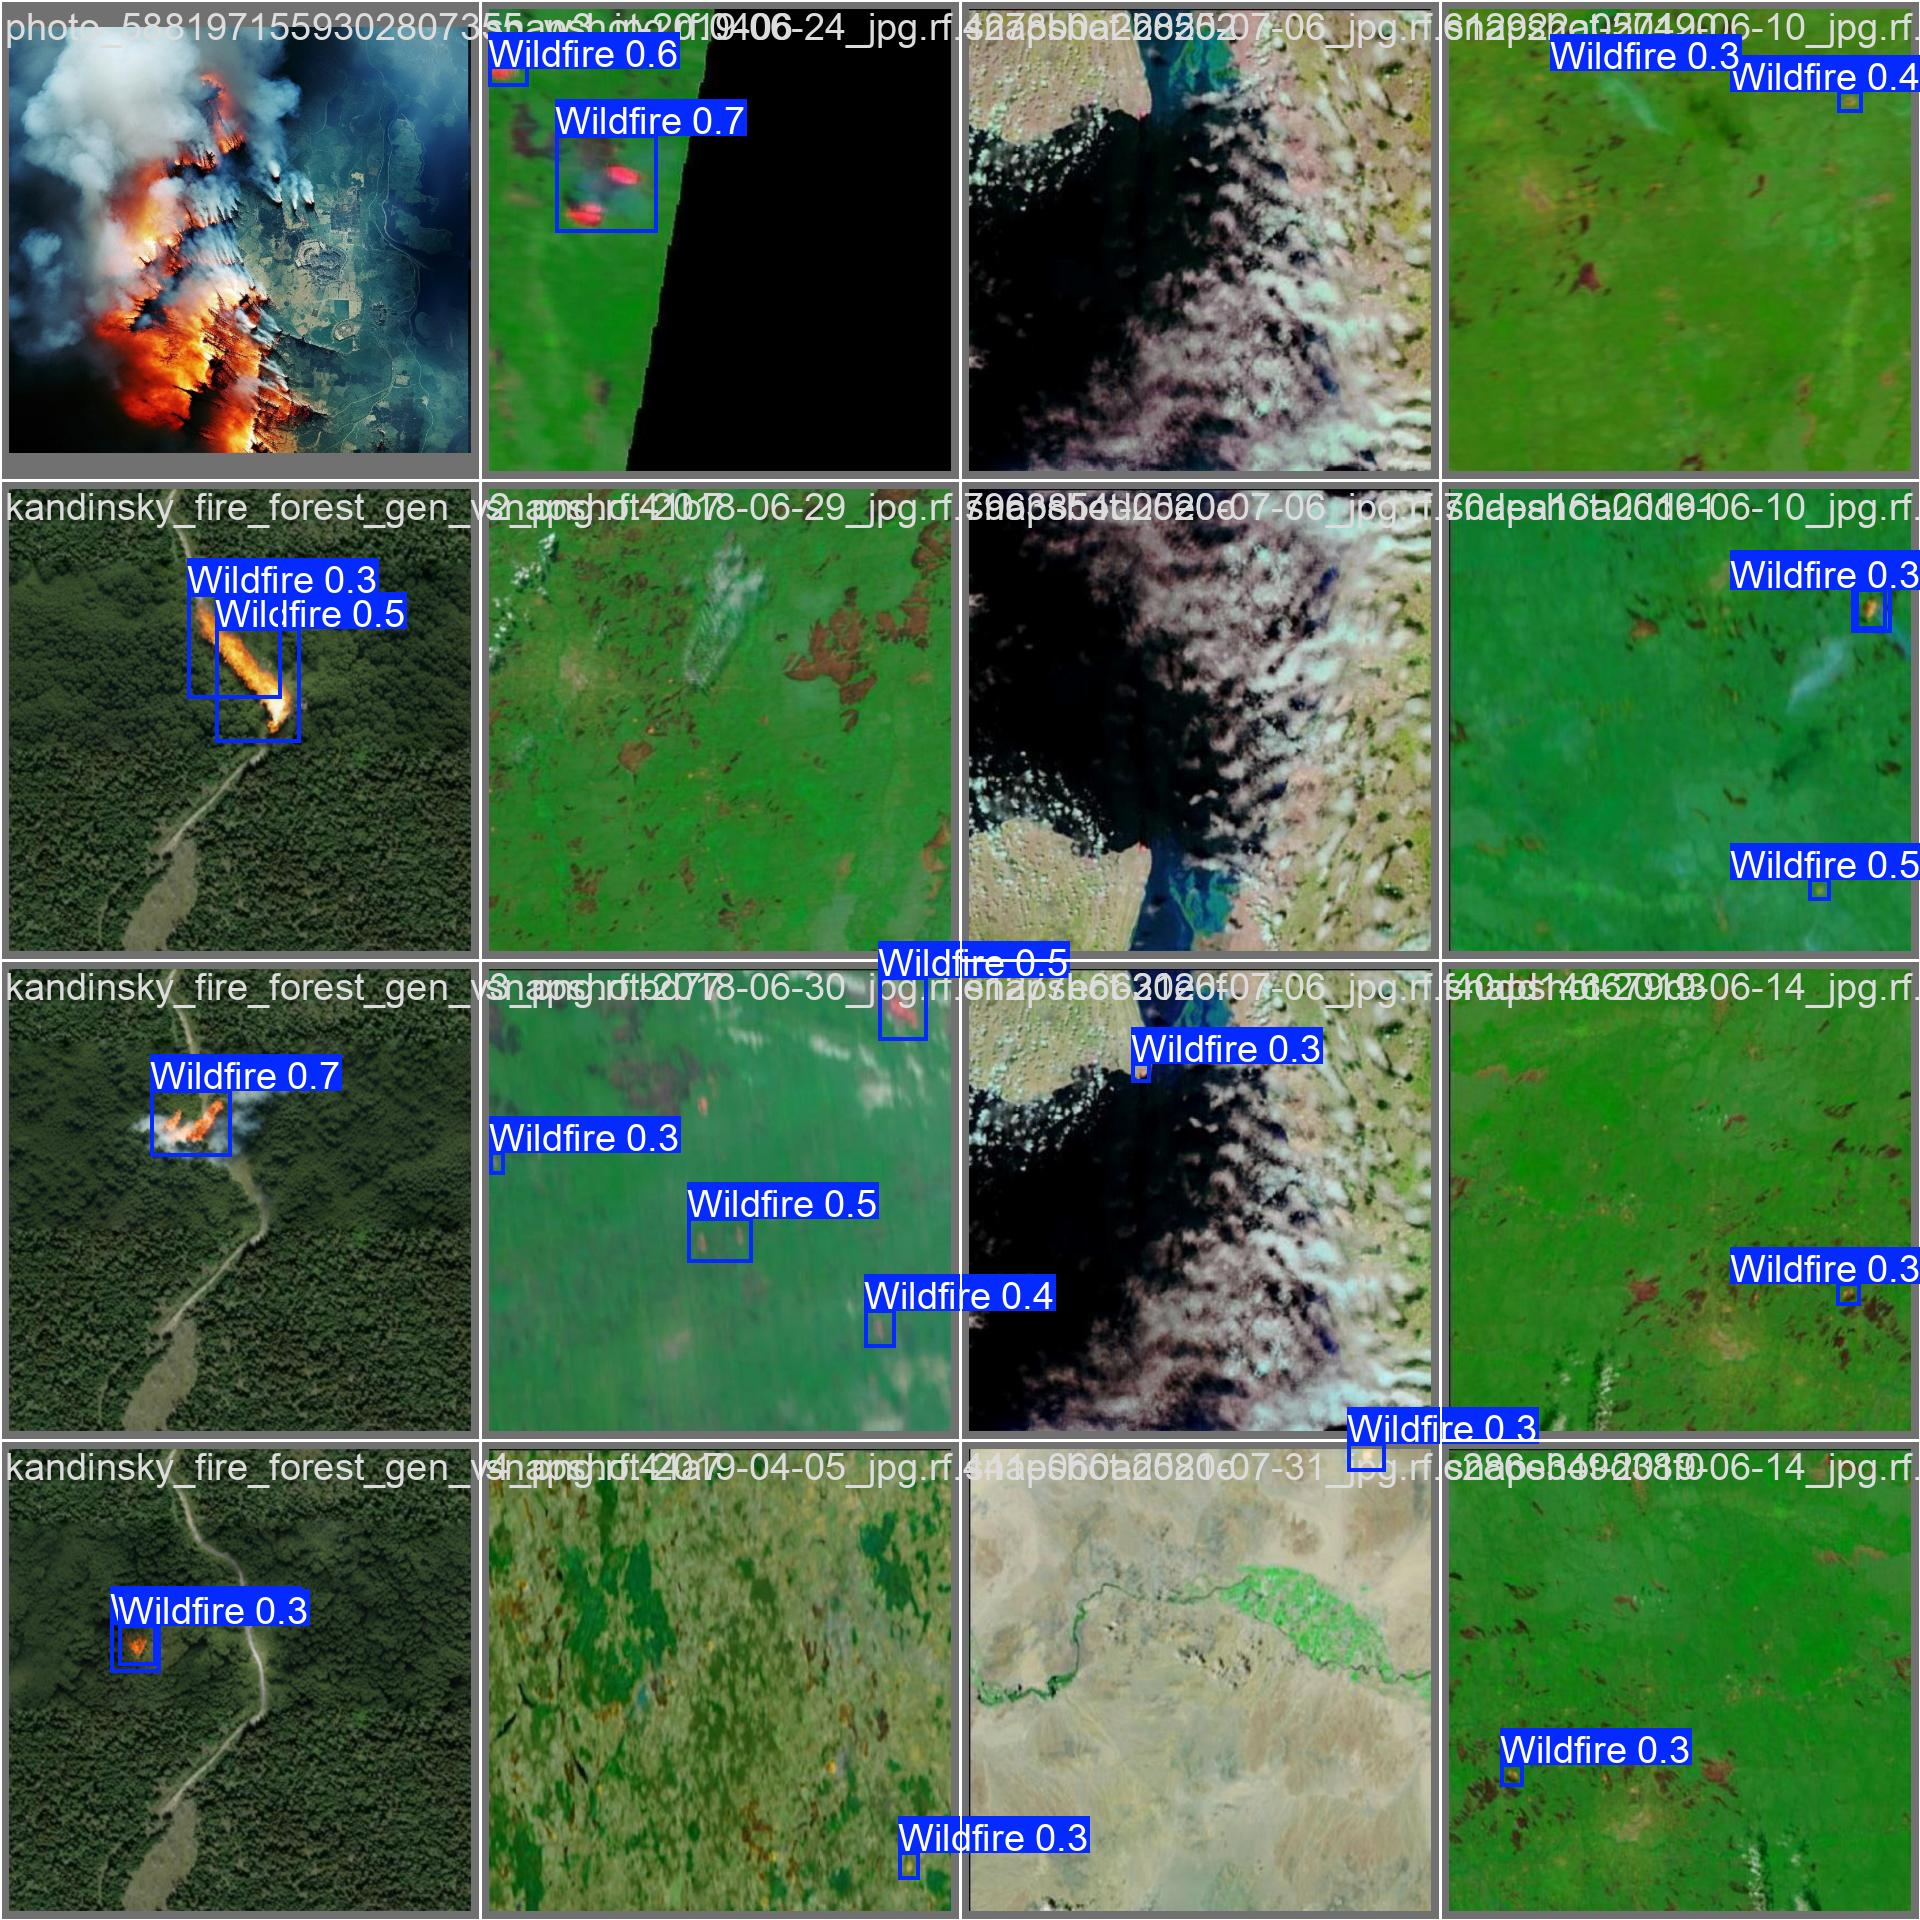

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Wildfire-4/valid/labels.cache... 980 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        980       2458      0.517      0.502      0.487      0.197
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.6ms preprocess, 7.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/276 /kaggle/working/datasets/Wildfire-4/test/images/2020_229_21_png_jpg.rf.f76b98b025758f83fb455346b07522b6.jpg: 800x800 2 Wildfires, 9.9ms
image 2/276 /kaggle/working/datasets/Wildfire-4/test/images/2020_230_19_png_jpg.rf.dd7cf914c2a41960c1ef00145f435308.jpg: 800x800 1 Wildfire, 9.9ms
image 3/276 /kaggle/working/datasets/Wildfire-4/test/images/2020_230_20_png_jpg.rf.bd39fa2291b47f7eb34035718645dd22.jpg: 800x800 1 Wildfire, 9.9ms
image 4/276 /kaggle/working/datasets/Wildfire-4/test/images/2020_232_15_png_jpg.rf.9a3be2138f2f17e2810014650edfa0f1.jpg: 800x800 7 Wildfires, 9.9ms
image 5/276 /kaggle/working/datasets/Wildfire-4/test/images/2020_232_20_png_jpg.rf.e8e60e1270965db835b7f5f31bbe27d5.jpg: 800x800 3 Wildfires, 9.9ms
image 6/276 /kaggle/working/datasets/Wildfire-4/test/images/20